<a href="https://colab.research.google.com/github/Zardian18/MuseGan_music/blob/master/MuseGAN_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/Zardian18/helper-functions-colab/master/helper.py

--2024-03-01 15:42:16--  https://raw.githubusercontent.com/Zardian18/helper-functions-colab/master/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26299 (26K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  25.68K  --.-KB/s    in 0.001s  

2024-03-01 15:42:16 (17.2 MB/s) - ‘helper.py’ saved [26299/26299]



In [2]:
%load_ext autoreload
%autoreload 2

import os
import glob
import numpy as np
import time
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, losses, callbacks

import music21

from helper import (
    parse_midi_files,
    load_parsed_files,
    get_midi_note,
    SinePositionEncoding,
)

In [ ]:
!pip install kaggle

In [4]:
from google.colab import drive
drive.mount("/content/drive")

! mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [5]:
!kaggle datasets download -d soumikrakshit/classical-music-midi

  0% 0.00/2.33M [00:00<?, ?B/s]
100% 2.33M/2.33M [00:00<00:00, 177MB/s]


In [6]:
!pip install --upgrade music21
!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
!apt-get update
!apt-get install musescore
!apt-get install xvfb
!sh -e /etc/init.d/x11-common start

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 2 RELEASES FOR UBUNTU 12.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore-stable
  sudo apt-get update
  sudo apt-get install musescore

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be updated

In [ ]:
!unzip /content/classical-music-midi.zip

In [8]:
BATCH_SIZE = 64

N_BARS = 2
N_STEPS_PER_BAR = 16
MAX_PITCH = 83
N_PITCHES = MAX_PITCH + 1
Z_DIM = 32


CRITIC_STEPS = 5
GP_WEIGHT = 10
CRITIC_LEARNING_RATE = 0.001
GENERATOR_LEARNING_RATE = 0.001
ADAM_BETA_1 = 0.5
ADAM_BETA_2 = 0.9
EPOCHS = 500
LOAD_MODEL = False




In [ ]:
# PARSE_MIDI_FILES = True
# PARSED_DATA_PATH = "/content/classical-music-midi/debussy"
# DATASET_REPETITIONS = 1

# SEQ_LEN = 70
# EMBEDDING_DIM = 128
# KEY_DIM = 128
# N_HEADS = 3
# DROPOUT_RATE = 0.3
# FEED_FORWARD_DIM = 128
# LOAD_MODEL = False

# # optimization
# EPOCHS = 1000
# BATCH_SIZE = 8

# GENERATE_LEN = 70

In [9]:
import os
os.putenv('DISPLAY', ':99.0')
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset

In [10]:
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

In [ ]:
# file = os.path.join("/content/classical-music-midi.zip")
# with np.load(file, encoding="bytes", allow_pickle=True) as f:
#     data = f

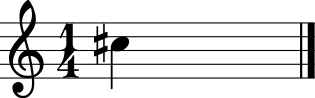

In [11]:
n = note.Note('C#5')
n.show()
n.show("midi")

In [12]:
file_list = glob.glob("/content/mozart/*.mid")
print(f"Found {len(file_list)} midi files")

Found 21 midi files


In [13]:
parser = music21.converter

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2006 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


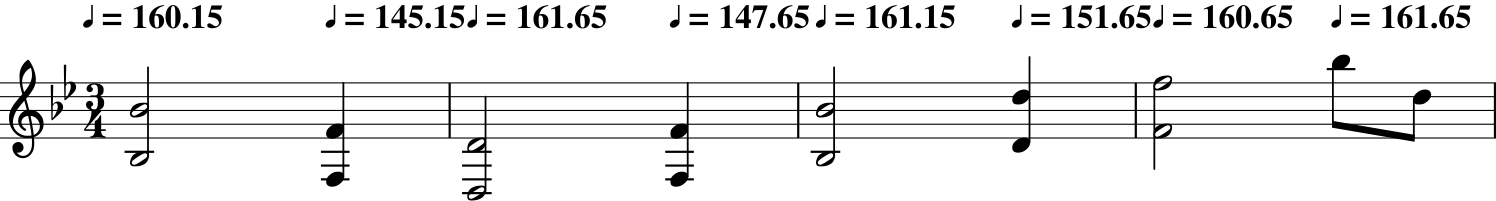

In [14]:
example_score = (
    music21.converter.parse(file_list[1]).splitAtQuarterLength(12)[0].chordify()
)

example_score.show()

example_score.show("midi")

In [19]:
# PARSE_MIDI_FILES = True
# PARSED_DATA_PATH = "/content/debussy/"
# DATASET_REPETITIONS = 1

# SEQ_LEN = 70
# EMBEDDING_DIM = 128
# KEY_DIM = 128
# N_HEADS = 3
# DROPOUT_RATE = 0.3
# FEED_FORWARD_DIM = 128
# LOAD_MODEL = False

# # optimization
# EPOCHS = 1000
# BATCH_SIZE = 64

# GENERATE_LEN = 70

In [ ]:
# if PARSE_MIDI_FILES:
#     notes, durations = parse_midi_files(
#         file_list, parser, SEQ_LEN + 1, PARSED_DATA_PATH
#     )
# else:
#     notes, durations = load_parsed_files()

In [21]:
# example_notes = notes[1000]
# example_durations = durations[1000]
# print("\nNotes string\n", example_notes, "...")
# print("\nDuration string\n", example_durations, "...")


Notes string
 E5 E5 E5 E5 E5 E5 E5 E5 E5 E5 E5 E5 E5 C5 C5 C5 C5 C5 C5 C5 C5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 E5 E5 E5 E5 E5 E5 E5 E5 C5 C5 C5 C5 C5 C5 C5 C5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D4 E4 ...

Duration string
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...


## Data loading

In [15]:
!pip install pretty_midi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 8.2 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592284 sha256=84fcac0329b952dde7a24f79c1b003333b40790d0fb650b7fd7df7c544316fdc
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [ ]:
# import os
# import pretty_midi
# import numpy as np

# # Function to load MIDI files and extract tracks
# def load_midi_files(folder_path):
#     midi_data = []

#     # Iterate through all files in the folder
#     for file_name in os.listdir(folder_path):
#         if file_name.endswith(".mid"):
#             file_path = os.path.join(folder_path, file_name)

#             # Load MIDI file using pretty_midi
#             midi = pretty_midi.PrettyMIDI(file_path)

#             # Extract tracks from the MIDI file
#             tracks = []
#             for i, instrument in enumerate(midi.instruments):
#                 if not instrument.is_drum:
#                     notes = []
#                     for note in instrument.notes:
#                         notes.append([note.start, note.end, note.pitch, note.velocity])
#                     tracks.append(np.array(notes))

#             # Append tracks to the midi_data list
#             midi_data.append(tracks)

#     return midi_data

# # Path to the folder containing MIDI files
# folder_path = '/content/debussy/'

# # Load MIDI files and extract tracks
# midi_data = load_midi_files(folder_path)

# # Display information about the loaded data
# print(f"{len(midi_data)} chorales in the dataset")

# for i, chorale in enumerate(midi_data):
#     print(f"\nChorale {i}")
#     for j, track in enumerate(chorale):
#         print(f"Track {j}: {track.shape} shape of chorale {i}")
#         print(track)

In [ ]:
# import os
# import pretty_midi
# import numpy as np

# # Function to load MIDI files and extract tracks
# def load_midi_files(folder_path):
#     midi_data = []

#     # Iterate through all files in the folder
#     for file_name in os.listdir(folder_path):
#         if file_name.endswith(".mid"):
#             file_path = os.path.join(folder_path, file_name)

#             # Load MIDI file using pretty_midi
#             midi = pretty_midi.PrettyMIDI(file_path)

#             # Extract tracks from the MIDI file
#             tracks = []
#             for i, instrument in enumerate(midi.instruments):
#                 if not instrument.is_drum:
#                     notes = []
#                     for note in instrument.notes:
#                         notes.append([note.start, note.end, note.pitch, note.velocity])
#                     tracks.append(np.array(notes))

#             # Append tracks to the midi_data list
#             midi_data.append(tracks)

#     return midi_data

# # Path to the folder containing MIDI files
# folder_path = '/content/mozart/'

# # Load MIDI files and extract tracks
# midi_data = load_midi_files(folder_path)

# # Convert midi_data to a list of NumPy arrays and ensure values are between 40 and 80
# processed_data = []
# for chorale in midi_data:
#     processed_chorale = []
#     for track in chorale:
#         # Clip values between 40 and 80
#         track = np.clip(track, 40, MAX_PITCH)
#         processed_chorale.append(track)
#     processed_data.append(processed_chorale)

# # Display information about the processed data
# print(f"{len(processed_data)} chorales in the dataset")

# for i, chorale in enumerate(processed_data):
#     print(f"\nChorale {i}")
#     for j, track in enumerate(chorale):
#         print(f"Track {j}: {track.shape} shape of chorale {i}")
#         print(track)

In [17]:
import os
import pretty_midi
import numpy as np

# Function to load MIDI files and extract tracks
def load_midi_files(folder_path):
    midi_data = []

    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".mid"):
            file_path = os.path.join(folder_path, file_name)

            # Load MIDI file using pretty_midi
            midi = pretty_midi.PrettyMIDI(file_path)

            # Extract tracks from the MIDI file
            tracks = []
            for i, instrument in enumerate(midi.instruments):
                if not instrument.is_drum:
                    notes = []
                    for note in instrument.notes:
                        notes.append([note.start, note.end, note.pitch, note.velocity])
                    tracks.append(np.array(notes))

            # Append tracks to the midi_data list
            midi_data.append(tracks)

    return midi_data

# Path to the folder containing MIDI files
folder_path = '/content/mozart/'

# Load MIDI files and extract tracks
midi_data = load_midi_files(folder_path)

# Convert midi_data to a list of NumPy arrays and ensure values are between 40 and 80
processed_data = []
for chorale in midi_data:
    processed_chorale = []
    for track in chorale:
        # Clip values between 40 and 80
        track = np.clip(track, 40, MAX_PITCH)
        processed_chorale.append(track)

    # Combine all tracks per chorale using np.concatenate
    combined_chorale = np.concatenate(processed_chorale, axis=0)
    processed_data.append(combined_chorale)

# Display information about the processed data
print(f"{len(processed_data)} chorales in the dataset")

for i, chorale in enumerate(processed_data):
    print(f"\nChorale {i}: {chorale.shape} shape")
    print(chorale)

21 chorales in the dataset

Chorale 0: (5874, 4) shape
[[40. 40. 83. 66.]
 [40. 40. 83. 68.]
 [40. 40. 83. 69.]
 ...
 [83. 83. 53. 40.]
 [83. 83. 41. 40.]
 [83. 83. 53. 40.]]

Chorale 1: (4110, 4) shape
[[40. 40. 70. 50.]
 [40. 40. 65. 45.]
 [40. 40. 62. 50.]
 ...
 [83. 83. 45. 54.]
 [83. 83. 46. 59.]
 [83. 83. 40. 59.]]

Chorale 2: (2819, 4) shape
[[40. 40. 71. 66.]
 [40. 40. 69. 64.]
 [40. 40. 68. 64.]
 ...
 [83. 83. 45. 74.]
 [83. 83. 49. 74.]
 [83. 83. 52. 74.]]

Chorale 3: (3191, 4) shape
[[40. 40. 77. 60.]
 [40. 40. 74. 53.]
 [40. 40. 70. 55.]
 ...
 [83. 83. 41. 71.]
 [83. 83. 46. 83.]
 [83. 83. 40. 75.]]

Chorale 4: (3517, 4) shape
[[40. 40. 69. 42.]
 [40. 40. 81. 47.]
 [40. 40. 78. 44.]
 ...
 [83. 83. 40. 72.]
 [83. 83. 42. 72.]
 [83. 83. 45. 72.]]

Chorale 5: (5778, 4) shape
[[40. 40. 79. 57.]
 [40. 40. 77. 56.]
 [40. 40. 75. 54.]
 ...
 [83. 83. 58. 40.]
 [83. 83. 53. 40.]
 [83. 83. 46. 40.]]

Chorale 6: (961, 4) shape
[[40. 40. 79. 50.]
 [40. 40. 76. 42.]
 [40. 40. 79. 43.]
 

In [18]:
processed_data[0].shape

(5874, 4)

In [19]:
processed_data[0][:8]

array([[40., 40., 83., 66.],
       [40., 40., 83., 68.],
       [40., 40., 83., 69.],
       [40., 40., 83., 70.],
       [40., 40., 83., 63.],
       [40., 40., 82., 70.],
       [40., 40., 81., 66.],
       [40., 40., 80., 64.]])

In [20]:
len(processed_data)

21

In [22]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-colorblind")

import os
import tensorflow as tf
from tensorflow.keras import (
    layers,
    models,
    optimizers,
    callbacks,
    initializers,
    metrics,
)

from helper import notes_to_midi, draw_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
N_SONGS = len(processed_data)
print(f"{N_SONGS} chorales in the dataset")
chorale = processed_data[0]
N_BEATS, N_TRACKS = chorale.shape
print(f"{N_BEATS, N_TRACKS} shape of chorale 0")
print("\nChorale 0")
print(chorale[:8])

21 chorales in the dataset
(5874, 4) shape of chorale 0

Chorale 0
[[40. 40. 83. 66.]
 [40. 40. 83. 68.]
 [40. 40. 83. 69.]
 [40. 40. 83. 70.]
 [40. 40. 83. 63.]
 [40. 40. 82. 70.]
 [40. 40. 81. 66.]
 [40. 40. 80. 64.]]


In [ ]:
# file_list = glob.glob("/content/classical-music-midi/debussy/*.mid")
# print(f"Found {len(file_list)} midi files")

Found 7 midi files


In [ ]:
# parser = music21.converter

In [ ]:
# example_score = (
#     music21.converter.parse(file_list[1]).splitAtQuarterLength(12)[0].chordify()
# )

/usr/local/lib/python3.10/dist-packages/music21/midi/translate.py:874: TranslateWarning: Unable to determine instrument from <music21.midi.MidiEvent SEQUENCE_TRACK_NAME, track=5, channel=None, data=b'Copyright \xa9 2010 by Bernd Krueger'>; getting generic Instrument
  warnings.warn(


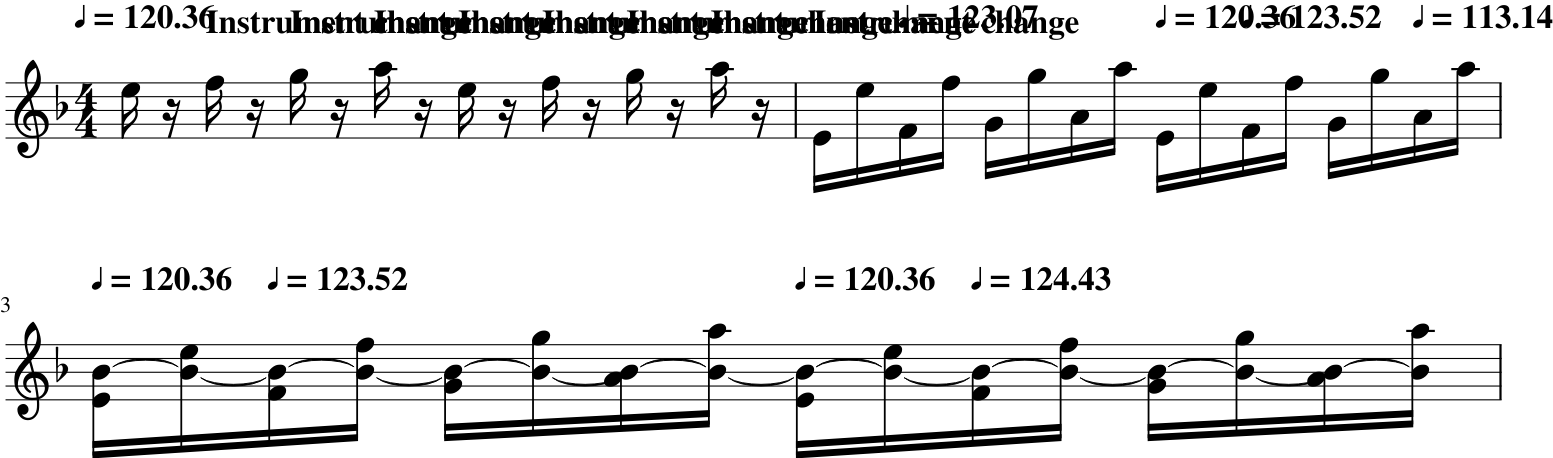

In [ ]:
# example_score.show()
# example_score.show("midi")


In [ ]:
# example_notes = notes[1000]
# example_durations = durations[1000]
# print("\nNotes string\n", example_notes, "...")
# print("\nDuration string\n", example_durations, "...")


Notes string
 E5 E5 E5 E5 E5 E5 E5 E5 E5 E5 E5 E5 E5 C5 C5 C5 C5 C5 C5 C5 C5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 E5 E5 E5 E5 E5 E5 E5 E5 C5 C5 C5 C5 C5 C5 C5 C5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D5 D4 E4 ...

Duration string
 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 ...


In [23]:
two_bars = np.array([x[: (N_STEPS_PER_BAR * N_BARS)] for x in processed_data])
two_bars = np.array(np.nan_to_num(two_bars, nan=MAX_PITCH), dtype=int)
two_bars = two_bars.reshape([N_SONGS, N_BARS, N_STEPS_PER_BAR, N_TRACKS])
print(f"Two bars shape {two_bars.shape}")

Two bars shape (21, 2, 16, 4)


In [24]:
data_binary = np.eye(N_PITCHES)[two_bars]
data_binary[data_binary == 0] = -1
data_binary = data_binary.transpose([0, 1, 2, 4, 3])
print(f"Data binary shape {data_binary.shape}")

Data binary shape (21, 2, 16, 84, 4)


In [25]:
initializer = initializers.RandomNormal(mean=0.0, stddev=0.02)


def conv(x, f, k, s, p):
    x = layers.Conv3D(
        filters=f,
        kernel_size=k,
        padding=p,
        strides=s,
        kernel_initializer=initializer,
    )(x)
    x = layers.LeakyReLU()(x)
    return x


def conv_t(x, f, k, s, a, p, bn):
    x = layers.Conv2DTranspose(
        filters=f,
        kernel_size=k,
        padding=p,
        strides=s,
        kernel_initializer=initializer,
    )(x)
    if bn:
        x = layers.BatchNormalization(momentum=0.9)(x)

    x = layers.Activation(a)(x)
    return x

In [26]:
def TemporalNetwork():
    input_layer = layers.Input(shape=(Z_DIM,), name="temporal_input")
    x = layers.Reshape([1, 1, Z_DIM])(input_layer)
    x = conv_t(x, f=1024, k=(2, 1), s=(1, 1), a="relu", p="valid", bn=True)
    x = conv_t(
        x, f=Z_DIM, k=(N_BARS - 1, 1), s=(1, 1), a="relu", p="valid", bn=True
    )
    output_layer = layers.Reshape([2, Z_DIM])(x)
    return models.Model(input_layer, output_layer)


TemporalNetwork().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 temporal_input (InputLayer  [(None, 32)]              0         
 )                                                               
                                                                 
 reshape (Reshape)           (None, 1, 1, 32)          0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 2, 1, 1024)        66560     
 anspose)                                                        
                                                                 
 batch_normalization (Batch  (None, 2, 1, 1024)        4096      
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 2, 1, 1024)        0         
                                                             

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [27]:
def BarGenerator():
    input_layer = layers.Input(shape=(Z_DIM * 4,), name="bar_generator_input")

    x = layers.Dense(1024)(input_layer)
    x = layers.BatchNormalization(momentum=0.9)(x)
    x = layers.Activation("relu")(x)
    x = layers.Reshape([2, 1, 512])(x)

    x = conv_t(x, f=512, k=(2, 1), s=(2, 1), a="relu", p="same", bn=True)
    x = conv_t(x, f=256, k=(2, 1), s=(2, 1), a="relu", p="same", bn=True)
    x = conv_t(x, f=256, k=(2, 1), s=(2, 1), a="relu", p="same", bn=True)
    x = conv_t(x, f=256, k=(1, 7), s=(1, 7), a="relu", p="same", bn=True)
    x = conv_t(x, f=1, k=(1, 12), s=(1, 12), a="tanh", p="same", bn=False)

    output_layer = layers.Reshape([1, N_STEPS_PER_BAR, N_PITCHES, 1])(x)

    return models.Model(input_layer, output_layer)


BarGenerator().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bar_generator_input (Input  [(None, 128)]             0         
 Layer)                                                          
                                                                 
 dense (Dense)               (None, 1024)              132096    
                                                                 
 batch_normalization_2 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 1024)              0         
                                                                 
 reshape_2 (Reshape)         (None, 2, 1, 512)         0         
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 4, 1, 512)         5248

In [28]:
def Generator():
    chords_input = layers.Input(shape=(Z_DIM,), name="chords_input")
    style_input = layers.Input(shape=(Z_DIM,), name="style_input")
    melody_input = layers.Input(shape=(N_TRACKS, Z_DIM), name="melody_input")
    groove_input = layers.Input(shape=(N_TRACKS, Z_DIM), name="groove_input")

    # CHORDS -> TEMPORAL NETWORK
    chords_tempNetwork = TemporalNetwork()
    chords_over_time = chords_tempNetwork(chords_input)  # [n_bars, z_dim]

    # MELODY -> TEMPORAL NETWORK
    melody_over_time = [
        None
    ] * N_TRACKS  # list of n_tracks [n_bars, z_dim] tensors
    melody_tempNetwork = [None] * N_TRACKS
    for track in range(N_TRACKS):
        melody_tempNetwork[track] = TemporalNetwork()
        melody_track = layers.Lambda(lambda x, track=track: x[:, track, :])(
            melody_input
        )
        melody_over_time[track] = melody_tempNetwork[track](melody_track)

    # CREATE BAR GENERATOR FOR EACH TRACK
    barGen = [None] * N_TRACKS
    for track in range(N_TRACKS):
        barGen[track] = BarGenerator()

    # CREATE OUTPUT FOR EVERY TRACK AND BAR
    bars_output = [None] * N_BARS
    c = [None] * N_BARS
    for bar in range(N_BARS):
        track_output = [None] * N_TRACKS

        c[bar] = layers.Lambda(lambda x, bar=bar: x[:, bar, :])(
            chords_over_time
        )  # [z_dim]
        s = style_input  # [z_dim]

        for track in range(N_TRACKS):
            m = layers.Lambda(lambda x, bar=bar: x[:, bar, :])(
                melody_over_time[track]
            )  # [z_dim]
            g = layers.Lambda(lambda x, track=track: x[:, track, :])(
                groove_input
            )  # [z_dim]

            z_input = layers.Concatenate(
                axis=1, name="total_input_bar_{}_track_{}".format(bar, track)
            )([c[bar], s, m, g])

            track_output[track] = barGen[track](z_input)

        bars_output[bar] = layers.Concatenate(axis=-1)(track_output)

    generator_output = layers.Concatenate(axis=1, name="concat_bars")(
        bars_output
    )

    return models.Model(
        [chords_input, style_input, melody_input, groove_input],
        generator_output,
    )


generator = Generator()
generator.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 melody_input (InputLayer)   [(None, 4, 32)]              0         []                            
                                                                                                  
 chords_input (InputLayer)   [(None, 32)]                 0         []                            
                                                                                                  
 lambda (Lambda)             (None, 32)                   0         ['melody_input[0][0]']        
                                                                                                  
 lambda_1 (Lambda)           (None, 32)                   0         ['melody_input[0][0]']        
                                                                                           

In [29]:
def Critic():
    critic_input = layers.Input(
        shape=(N_BARS, N_STEPS_PER_BAR, N_PITCHES, N_TRACKS),
        name="critic_input",
    )

    x = critic_input

    x = conv(x, f=128, k=(2, 1, 1), s=(1, 1, 1), p="valid")
    x = conv(x, f=128, k=(N_BARS - 1, 1, 1), s=(1, 1, 1), p="valid")
    x = conv(x, f=128, k=(1, 1, 12), s=(1, 1, 12), p="same")
    x = conv(x, f=128, k=(1, 1, 7), s=(1, 1, 7), p="same")
    x = conv(x, f=128, k=(1, 2, 1), s=(1, 2, 1), p="same")
    x = conv(x, f=128, k=(1, 2, 1), s=(1, 2, 1), p="same")
    x = conv(x, f=256, k=(1, 4, 1), s=(1, 2, 1), p="same")
    x = conv(x, f=512, k=(1, 3, 1), s=(1, 2, 1), p="same")

    x = layers.Flatten()(x)

    x = layers.Dense(1024, kernel_initializer=initializer)(x)
    x = layers.LeakyReLU()(x)

    critic_output = layers.Dense(
        1, activation=None, kernel_initializer=initializer
    )(x)

    return models.Model(critic_input, critic_output)


critic = Critic()
critic.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 critic_input (InputLayer)   [(None, 2, 16, 84, 4)]    0         
                                                                 
 conv3d (Conv3D)             (None, 1, 16, 84, 128)    1152      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1, 16, 84, 128)    0         
                                                                 
 conv3d_1 (Conv3D)           (None, 1, 16, 84, 128)    16512     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 1, 16, 84, 128)    0         
                                                                 
 conv3d_2 (Conv3D)           (None, 1, 16, 7, 128)     196736    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 1, 16, 7, 128)     0  

In [30]:
class MuseGAN(models.Model):
    def __init__(self, critic, generator, latent_dim, critic_steps, gp_weight):
        super(MuseGAN, self).__init__()
        self.critic = critic
        self.generator = generator
        self.latent_dim = latent_dim
        self.critic_steps = critic_steps
        self.gp_weight = gp_weight

    def compile(self, c_optimizer, g_optimizer):
        super(MuseGAN, self).compile()
        self.c_optimizer = c_optimizer
        self.g_optimizer = g_optimizer
        self.c_wass_loss_metric = metrics.Mean(name="c_wass_loss")
        self.c_gp_metric = metrics.Mean(name="c_gp")
        self.c_loss_metric = metrics.Mean(name="c_loss")
        self.g_loss_metric = metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [
            self.c_loss_metric,
            self.c_wass_loss_metric,
            self.c_gp_metric,
            self.g_loss_metric,
        ]

    def gradient_penalty(self, batch_size, real_images, fake_images):
        alpha = tf.random.normal([batch_size, 1, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            pred = self.critic(interpolated, training=True)

        grads = gp_tape.gradient(pred, [interpolated])[0]
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

    def train_step(self, real_images):
        batch_size = tf.shape(real_images)[0]

        for i in range(self.critic_steps):
            chords_random_latent_vectors = tf.random.normal(
                shape=(batch_size, self.latent_dim)
            )
            style_random_latent_vectors = tf.random.normal(
                shape=(batch_size, self.latent_dim)
            )
            melody_random_latent_vectors = tf.random.normal(
                shape=(batch_size, N_TRACKS, self.latent_dim)
            )
            groove_random_latent_vectors = tf.random.normal(
                shape=(batch_size, N_TRACKS, self.latent_dim)
            )

            random_latent_vectors = [
                chords_random_latent_vectors,
                style_random_latent_vectors,
                melody_random_latent_vectors,
                groove_random_latent_vectors,
            ]

            with tf.GradientTape() as tape:
                fake_images = self.generator(
                    random_latent_vectors, training=True
                )
                fake_predictions = self.critic(fake_images, training=True)
                real_predictions = self.critic(real_images, training=True)

                c_wass_loss = tf.reduce_mean(fake_predictions) - tf.reduce_mean(
                    real_predictions
                )
                c_gp = self.gradient_penalty(
                    batch_size, real_images, fake_images
                )
                c_loss = c_wass_loss + c_gp * self.gp_weight

            c_gradient = tape.gradient(c_loss, self.critic.trainable_variables)
            self.c_optimizer.apply_gradients(
                zip(c_gradient, self.critic.trainable_variables)
            )

        chords_random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim)
        )
        style_random_latent_vectors = tf.random.normal(
            shape=(batch_size, self.latent_dim)
        )
        melody_random_latent_vectors = tf.random.normal(
            shape=(batch_size, N_TRACKS, self.latent_dim)
        )
        groove_random_latent_vectors = tf.random.normal(
            shape=(batch_size, N_TRACKS, self.latent_dim)
        )

        random_latent_vectors = [
            chords_random_latent_vectors,
            style_random_latent_vectors,
            melody_random_latent_vectors,
            groove_random_latent_vectors,
        ]

        with tf.GradientTape() as tape:
            fake_images = self.generator(random_latent_vectors, training=True)
            fake_predictions = self.critic(fake_images, training=True)
            g_loss = -tf.reduce_mean(fake_predictions)

        gen_gradient = tape.gradient(g_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(
            zip(gen_gradient, self.generator.trainable_variables)
        )

        self.c_loss_metric.update_state(c_loss)
        self.c_wass_loss_metric.update_state(c_wass_loss)
        self.c_gp_metric.update_state(c_gp)
        self.g_loss_metric.update_state(g_loss)

        return {m.name: m.result() for m in self.metrics}

    def generate_piano_roll(self, num_scores):
        chords_random_latent_vectors = tf.random.normal(
            shape=(num_scores, Z_DIM)
        )
        style_random_latent_vectors = tf.random.normal(
            shape=(num_scores, Z_DIM)
        )
        melody_random_latent_vectors = tf.random.normal(
            shape=(num_scores, N_TRACKS, Z_DIM)
        )
        groove_random_latent_vectors = tf.random.normal(
            shape=(num_scores, N_TRACKS, Z_DIM)
        )
        random_latent_vectors = [
            chords_random_latent_vectors,
            style_random_latent_vectors,
            melody_random_latent_vectors,
            groove_random_latent_vectors,
        ]
        generated_music = self.generator(random_latent_vectors)
        generated_music = generated_music.numpy()
        return generated_music

In [31]:
musegan = MuseGAN(
    critic=critic,
    generator=generator,
    latent_dim=Z_DIM,
    critic_steps=CRITIC_STEPS,
    gp_weight=GP_WEIGHT,
)

In [32]:
musegan.compile(
    c_optimizer=optimizers.Adam(
        learning_rate=CRITIC_LEARNING_RATE,
        beta_1=ADAM_BETA_1,
        beta_2=ADAM_BETA_2,
    ),
    g_optimizer=optimizers.Adam(
        learning_rate=GENERATOR_LEARNING_RATE,
        beta_1=ADAM_BETA_1,
        beta_2=ADAM_BETA_2,
    ),
)

In [33]:
!mkdir output

In [34]:
from helper import display

In [35]:
model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath="./checkpoint/checkpoint.ckpt",
    save_weights_only=True,
    save_freq="epoch",
    verbose=0,
)

tensorboard_callback = callbacks.TensorBoard(log_dir="./logs")


class MusicGenerator(callbacks.Callback):
    def __init__(self, num_scores):
        self.num_scores = num_scores

    def on_epoch_end(self, epoch, logs=None):
        if epoch % 1 == 0:
            generated_music = self.model.generate_piano_roll(self.num_scores)
            notes_to_midi(
                generated_music,
                N_BARS,
                N_TRACKS,
                N_STEPS_PER_BAR,
                filename="output_" + str(epoch).zfill(4),
            )
            # display(generated_images, save_to = "./output/generated_img_%03d.png" % (epoch), cmap = None)


music_generator_callback = MusicGenerator(1)

In [36]:
history = musegan.fit(
    data_binary,
    epochs=1000,
    callbacks=[
        model_checkpoint_callback,
        tensorboard_callback,
        music_generator_callback,
    ],
)

Epoch 1/1000
1/1 [==============================] - 67s 67s/step - c_loss: 9.3756 - c_wass_loss: -0.5831 - c_gp: 0.9959 - g_loss: 0.0577
Epoch 2/1000
1/1 [==============================] - 1s 1s/step - c_loss: -626.1311 - c_wass_loss: -3118.9717 - c_gp: 249.2841 - g_loss: -193.5112
Epoch 3/1000
1/1 [==============================] - 2s 2s/step - c_loss: -928.4508 - c_wass_loss: -2078.3191 - c_gp: 114.9868 - g_loss: -529.5599
Epoch 4/1000
1/1 [==============================] - 1s 1s/step - c_loss: -781.6647 - c_wass_loss: -1408.2856 - c_gp: 62.6621 - g_loss: -524.6130
Epoch 5/1000
1/1 [==============================] - 1s 1s/step - c_loss: -641.2012 - c_wass_loss: -1323.9916 - c_gp: 68.2790 - g_loss: 20.2259
Epoch 6/1000
1/1 [==============================] - 1s 1s/step - c_loss: -406.4493 - c_wass_loss: -1286.4651 - c_gp: 88.0016 - g_loss: -493.0273
Epoch 7/1000
1/1 [==============================] - 2s 2s/step - c_loss: -345.1263 - c_wass_loss: -697.4413 - c_gp: 35.2315 - g_loss: -732

KeyboardInterrupt: 

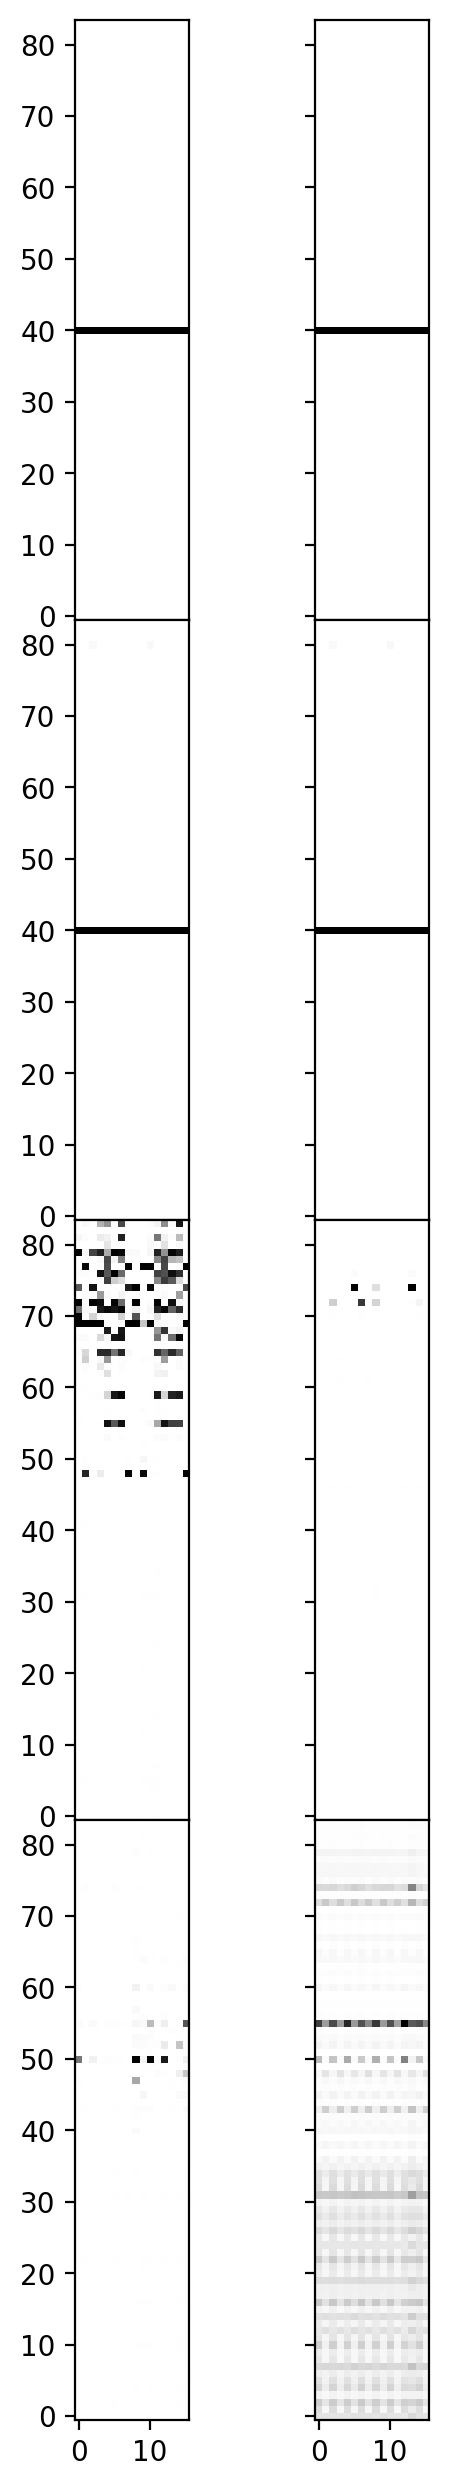

In [37]:
num_scores = 1
chords_random_latent_vectors = np.random.normal(size=(num_scores, Z_DIM))
style_random_latent_vectors = np.random.normal(size=(num_scores, Z_DIM))
melody_random_latent_vectors = np.random.normal(
    size=(num_scores, N_TRACKS, Z_DIM)
)
groove_random_latent_vectors = np.random.normal(
    size=(num_scores, N_TRACKS, Z_DIM)
)
random_latent_vectors = [
    chords_random_latent_vectors,
    style_random_latent_vectors,
    melody_random_latent_vectors,
    groove_random_latent_vectors,
]
generated_music = generator(random_latent_vectors)
generated_music = generated_music.numpy()

draw_score(generated_music, 0)
notes_to_midi(
    generated_music, N_BARS, N_TRACKS, N_STEPS_PER_BAR, filename="output_midi"
)

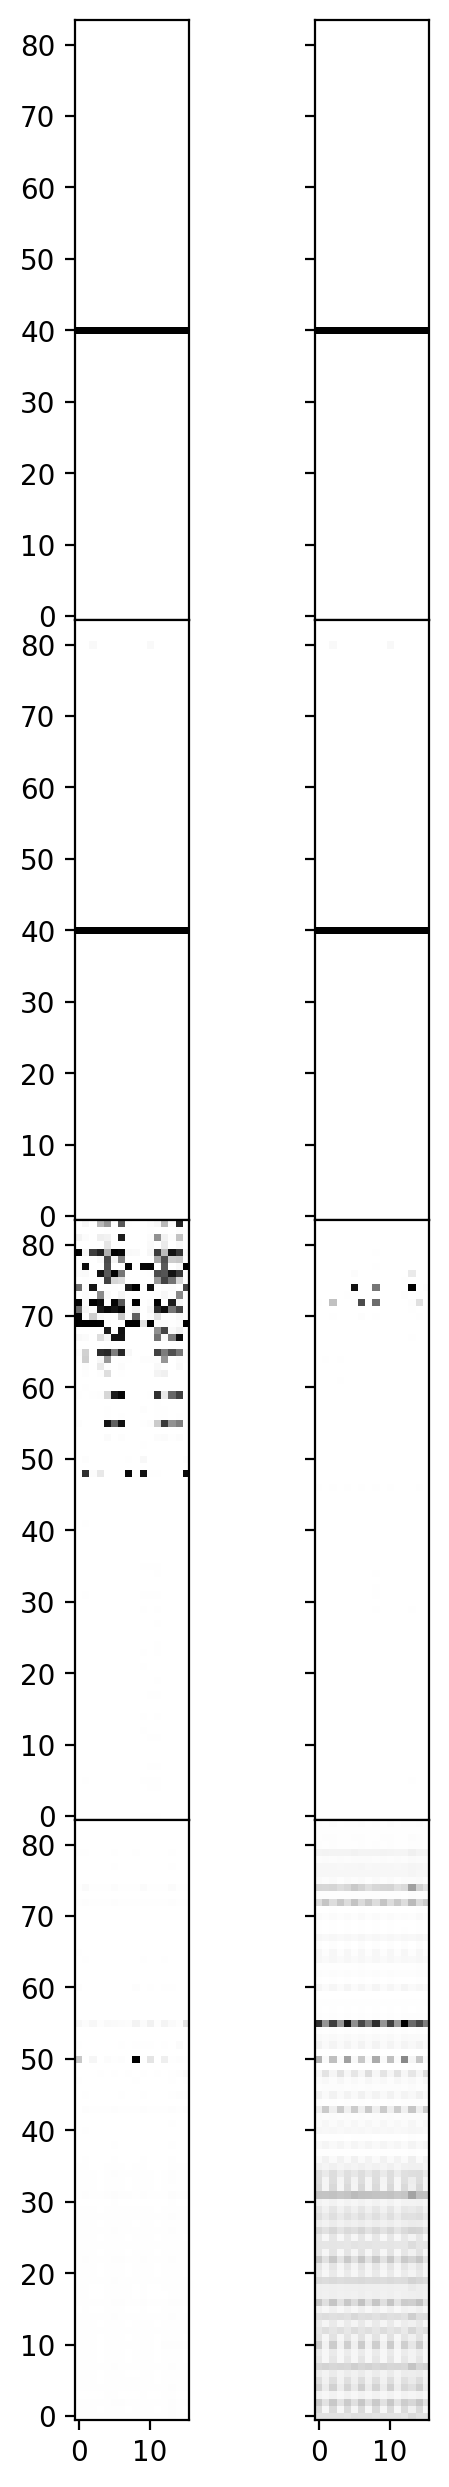

In [38]:
chords_random_latent_vectors_2 = np.random.normal(size=(num_scores, Z_DIM))
random_latent_vectors_2 = [
    chords_random_latent_vectors_2,
    style_random_latent_vectors,
    melody_random_latent_vectors,
    groove_random_latent_vectors,
]
generated_music_2 = generator(random_latent_vectors_2)
generated_music_2 = generated_music_2.numpy()
draw_score(generated_music_2, 0)
notes_to_midi(
    generated_music_2,
    N_BARS,
    N_TRACKS,
    N_STEPS_PER_BAR,
    filename="output_midi_chords_changed",
)

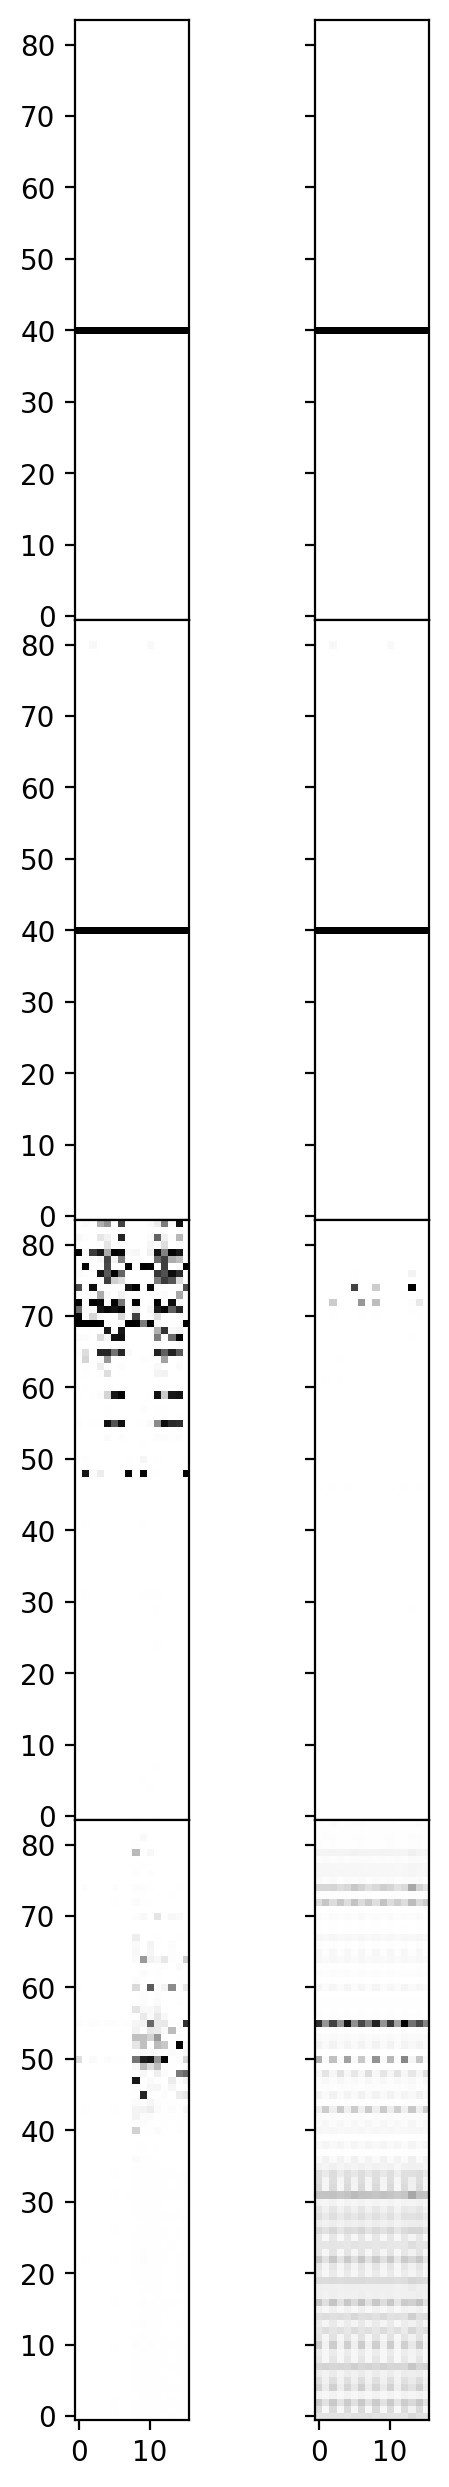

In [39]:
style_random_latent_vectors_2 = np.random.normal(size=(num_scores, Z_DIM))
random_latent_vectors_3 = [
    chords_random_latent_vectors,
    style_random_latent_vectors_2,
    melody_random_latent_vectors,
    groove_random_latent_vectors,
]
generated_music_3 = generator(random_latent_vectors_3)
generated_music_3 = generated_music_3.numpy()
draw_score(generated_music_3, 0)
notes_to_midi(
    generated_music_3,
    N_BARS,
    N_TRACKS,
    N_STEPS_PER_BAR,
    filename="output_midi_style_changed",
)

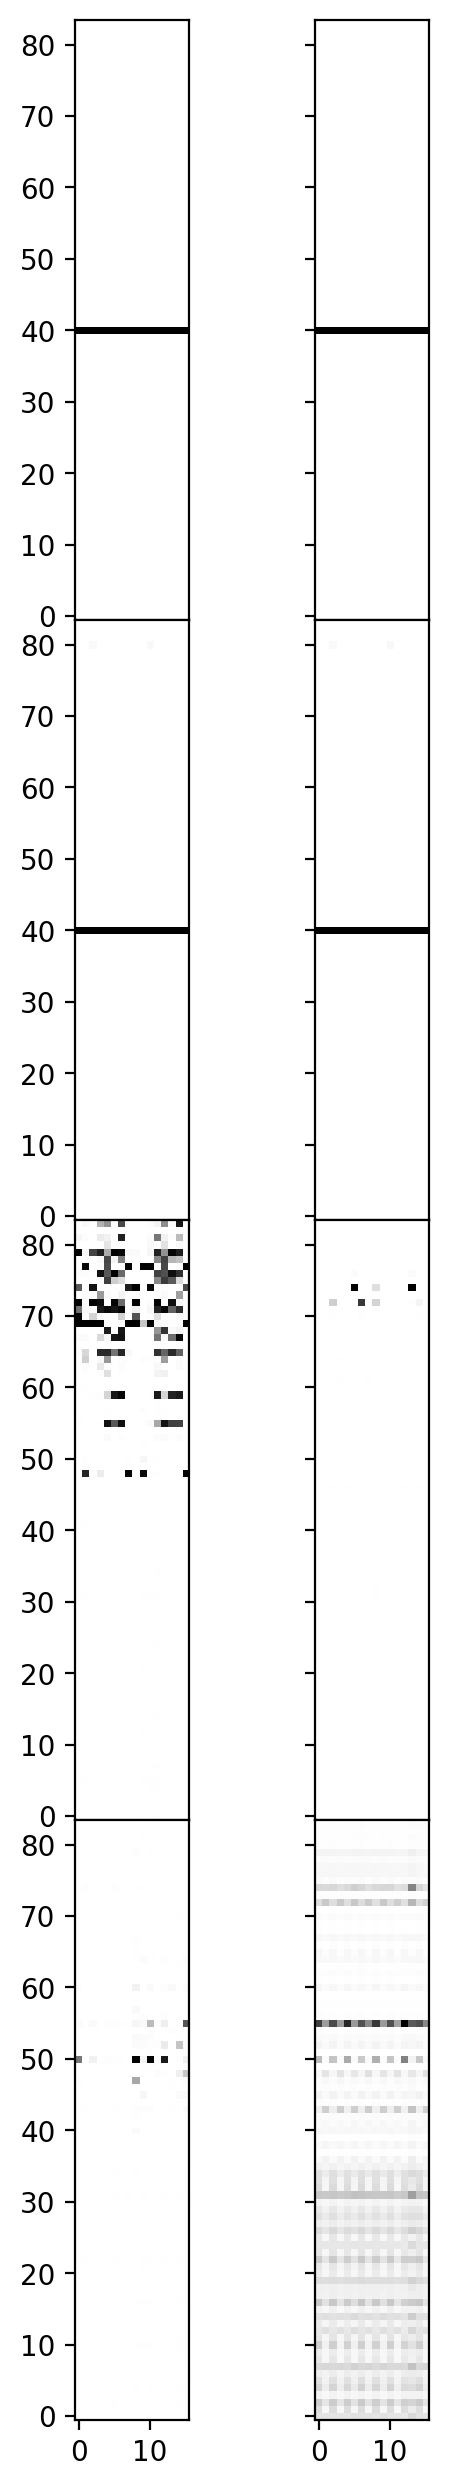

In [40]:
melody_random_latent_vectors_2 = np.copy(melody_random_latent_vectors)
melody_random_latent_vectors_2[:, 0, :] = np.random.normal(
    size=(num_scores, Z_DIM)
)

random_latent_vectors_4 = [
    chords_random_latent_vectors,
    style_random_latent_vectors,
    melody_random_latent_vectors_2,
    groove_random_latent_vectors,
]
generated_music_4 = generator(random_latent_vectors_4)
generated_music_4 = generated_music_4.numpy()
draw_score(generated_music_4, 0)
notes_to_midi(
    generated_music_4,
    N_BARS,
    N_TRACKS,
    N_STEPS_PER_BAR,
    filename="output_midi_melody_changed",
)

In [121]:
import os
os.putenv('DISPLAY', ':99.0')
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset

/usr/bin/Xvfb already running.


In [122]:
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'

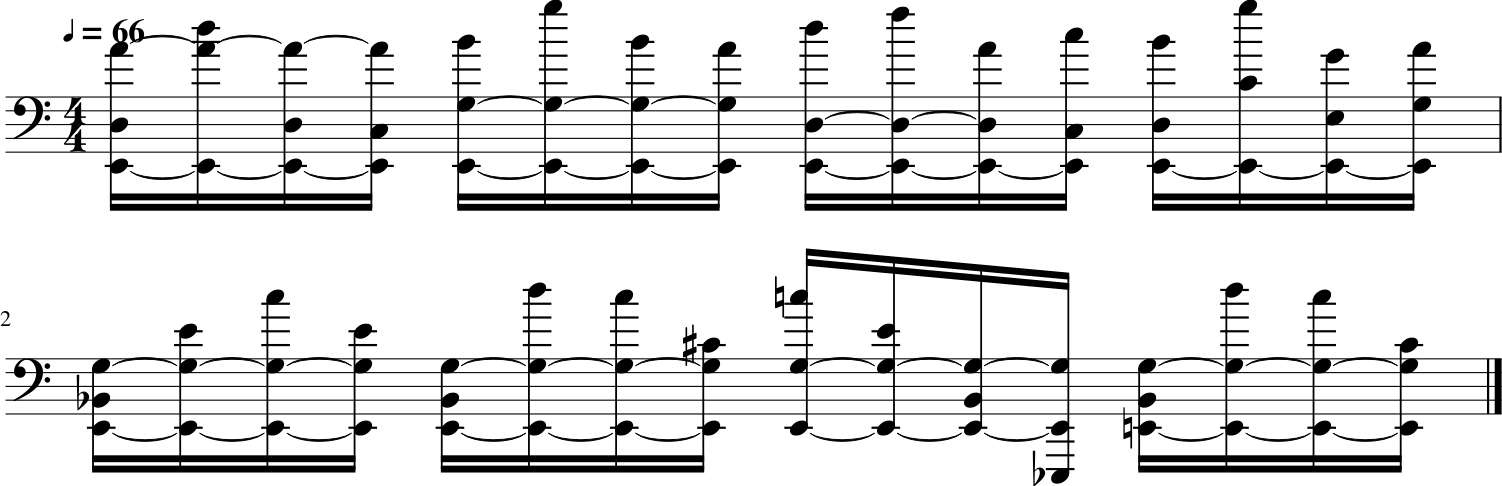

In [42]:
file = "/content/output/output_midi_0.midi"
example_score = music21.converter.parse(file).chordify()
example_score.show()
example_score.show("midi")

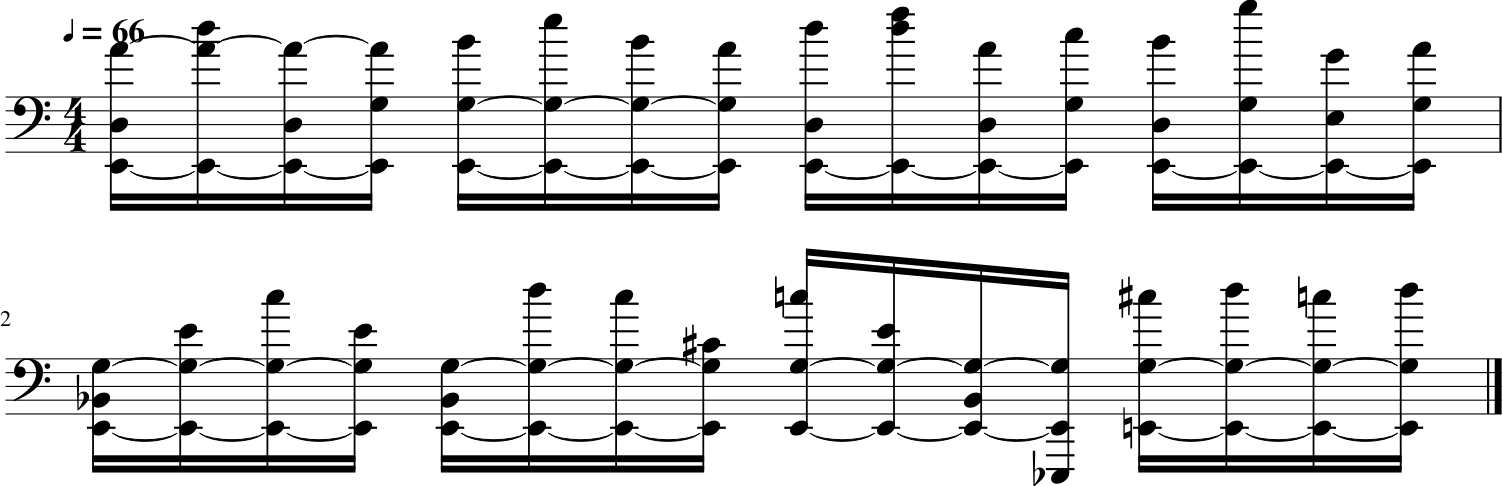

In [43]:
file = "/content/output/output_midi_chords_changed_0.midi"
example_score = music21.converter.parse(file).chordify()
example_score.show()
example_score.show("midi")

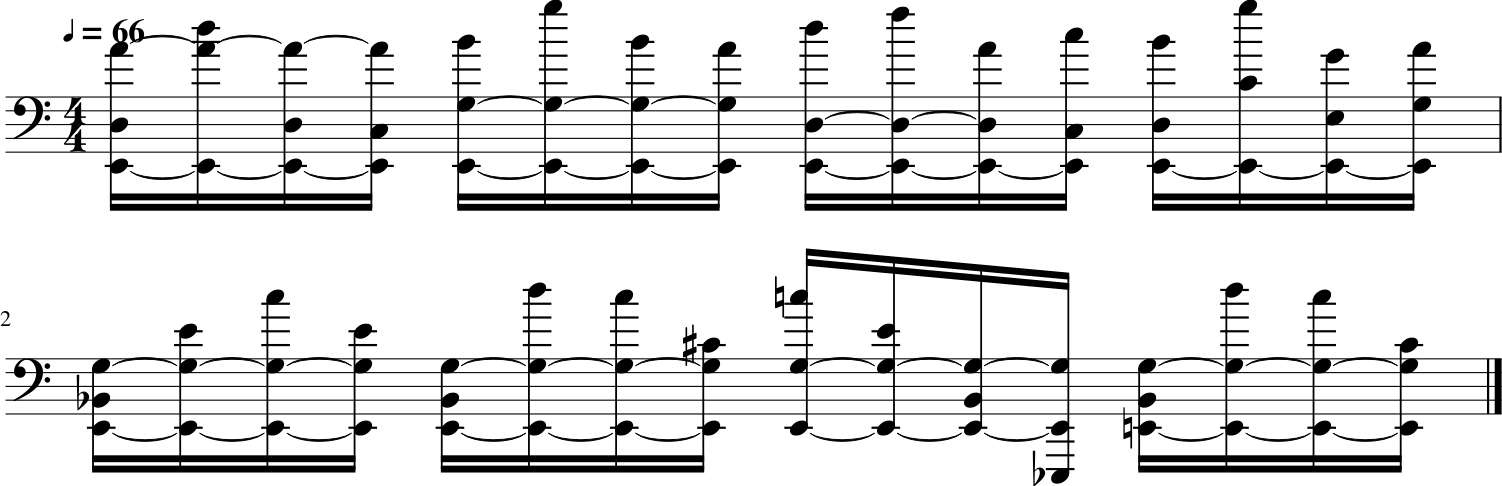

In [44]:
file = "/content/output/output_midi_melody_changed_0.midi"
example_score = music21.converter.parse(file).chordify()
example_score.show()
example_score.show("midi")

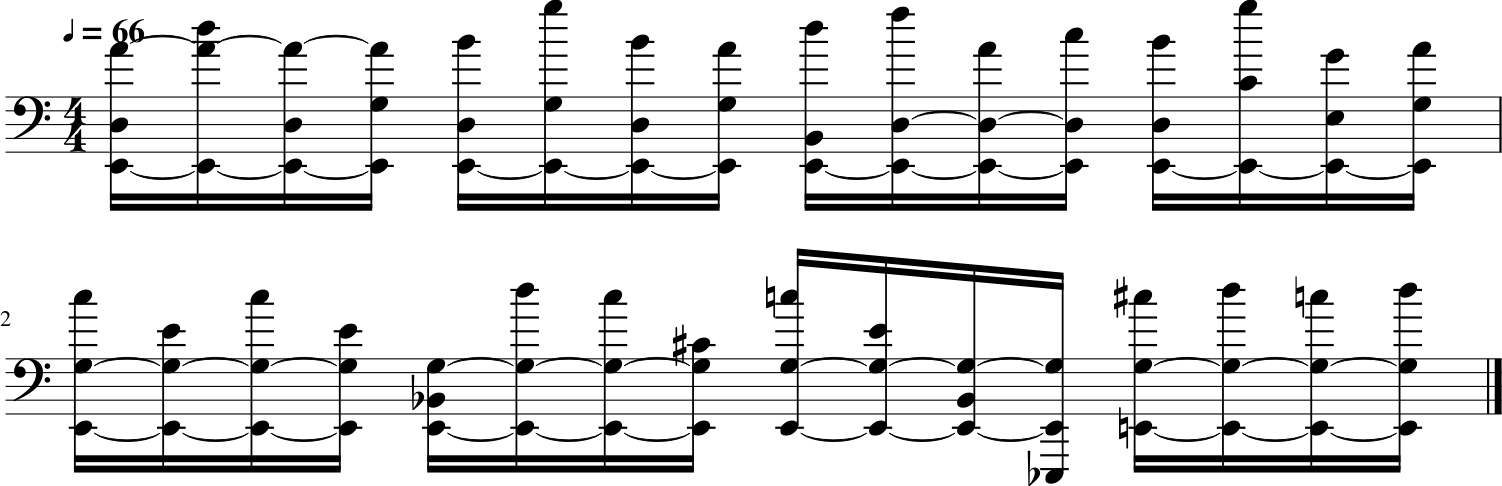

In [45]:
file = "/content/output/output_midi_style_changed_0.midi"
example_score = music21.converter.parse(file).chordify()
example_score.show()
example_score.show("midi")

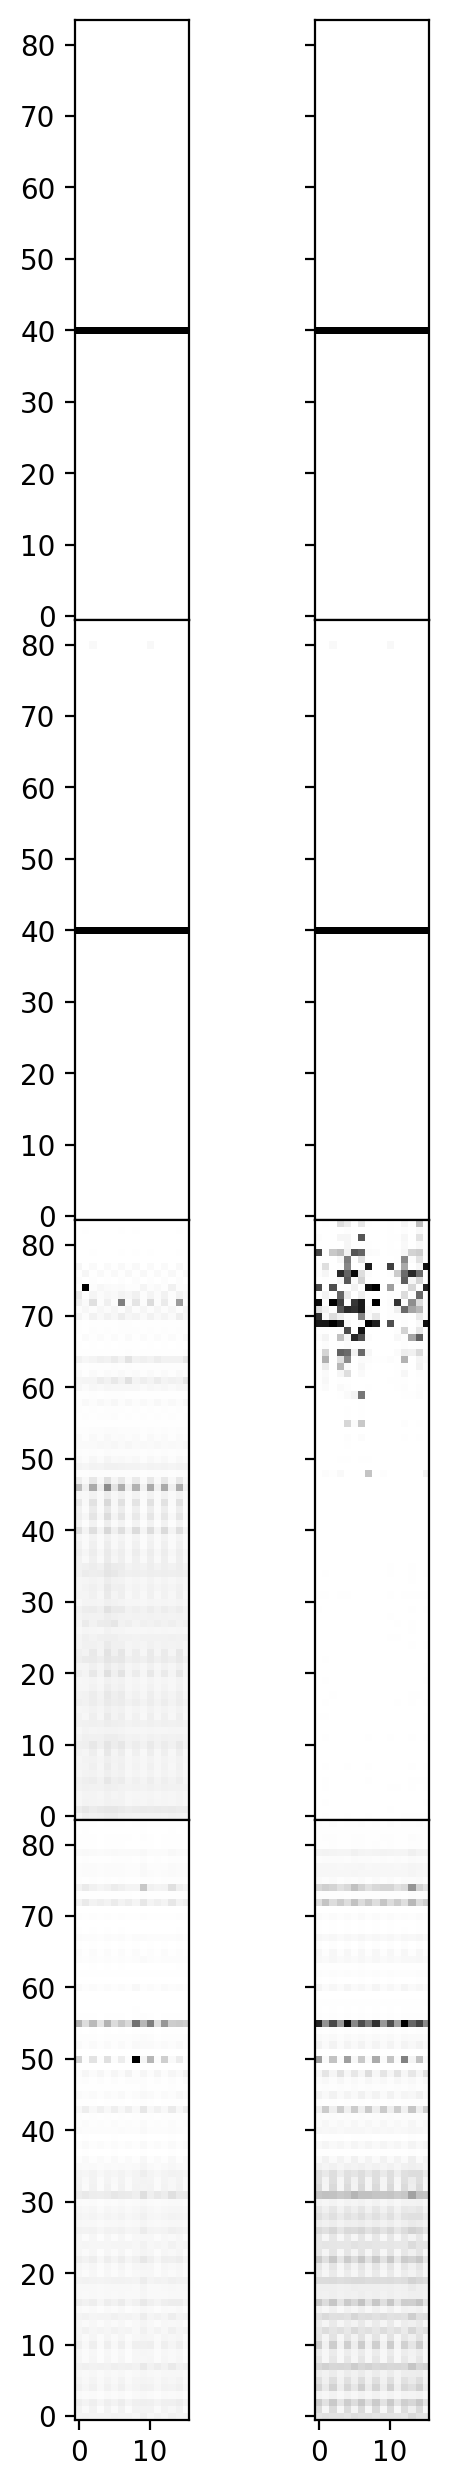

In [48]:
num_scores = 100
chords_random_latent_vectors = np.random.normal(size=(num_scores, Z_DIM))
style_random_latent_vectors = np.random.normal(size=(num_scores, Z_DIM))
melody_random_latent_vectors = np.random.normal(
    size=(num_scores, N_TRACKS, Z_DIM)
)
groove_random_latent_vectors = np.random.normal(
    size=(num_scores, N_TRACKS, Z_DIM)
)
random_latent_vectors = [
    chords_random_latent_vectors,
    style_random_latent_vectors,
    melody_random_latent_vectors,
    groove_random_latent_vectors,
]
generated_music = generator(random_latent_vectors)
generated_music = generated_music.numpy()

draw_score(generated_music, 0)
notes_to_midi(
    generated_music, N_BARS, N_TRACKS, N_STEPS_PER_BAR, filename="output_midi"
)

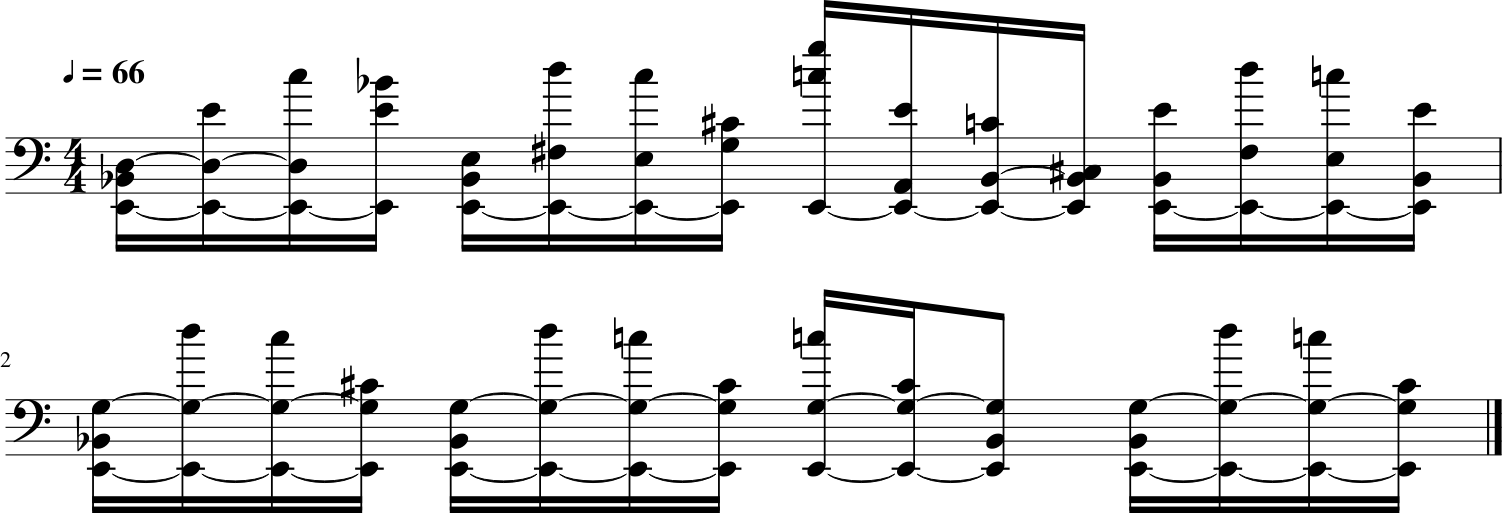

In [50]:
file = "/content/output/output_midi_99.midi"
example_score = music21.converter.parse(file).chordify()
example_score.show()
example_score.show("midi")